In [1]:
from GNG2 import GrowingNeuralGas

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████▍| 199/200 [00:04<00:00, 47.76it/s]


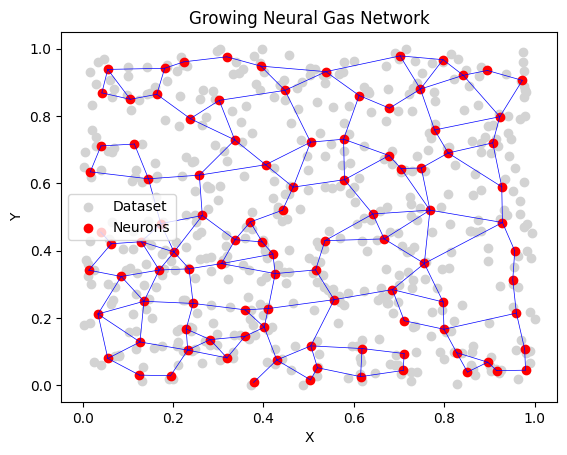

In [2]:
import numpy as np

# Generate a synthetic dataset (e.g., 2D points in a grid with noise)
np.random.seed(0)
dataset = np.random.rand(500, 2)  # 500 data points in 2D

# Set GNG parameters
max_neurons = 100          # Maximum number of neurons
max_iter = 200             # Maximum number of iterations
max_age = 15               # Maximum age of an edge before it is removed
eb = 0.1                   # Learning rate for the nearest neuron
en = 0.006                 # Learning rate for neighbors
alpha = 0.5                # Error reduction factor for neurons involved in new neurons
beta = 0.0005              # Error reduction factor for all neurons each iteration
l = 100                    # Number of learning steps between neuron insertions

# Initialize and train the Growing Neural Gas network
gng = GrowingNeuralGas(max_neurons, max_iter, max_age, eb, en, alpha, beta, l, dataset)
trained_gng = gng.learn()

# Access trained neurons and edges for visualization
neurons = np.array([v['weight'] for v in trained_gng.vs])
edges = [(e.source, e.target) for e in trained_gng.es]

# Plotting the results
import matplotlib.pyplot as plt

# Plot the dataset
plt.scatter(dataset[:, 0], dataset[:, 1], color='lightgrey', label="Dataset")

# Plot the neurons
plt.scatter(neurons[:, 0], neurons[:, 1], color='red', label="Neurons")

# Plot the edges
for edge in edges:
    plt.plot([neurons[edge[0]][0], neurons[edge[1]][0]],
             [neurons[edge[0]][1], neurons[edge[1]][1]], color='blue', lw=0.5)

plt.legend()
plt.title("Growing Neural Gas Network")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()


In [2]:
import numpy as np

# Define the number of data points and the shape of each data point
num_data_points = 500
array_shape = (30, 30)

# Generate a dataset where each data point is a 30x30 array with random values
dataset = np.array([np.random.rand(*array_shape) for _ in range(num_data_points)])

# Check the dataset shape
print(dataset.shape)  # Should be (500, 30, 30)

(500, 30, 30)


In [3]:
type(dataset)

numpy.ndarray

In [18]:
import numpy as np
import os

# Folder containing .npy files
folder_path = '../LLCS/Dataset3_Official/NumpyData/train/'

# Initialize an empty list to store all numpy arrays
dataset = []

# Loop through each file in the folder
for file_name in os.listdir(folder_path):
    # Check if the file is a .npy file
    if file_name.endswith('.npy'):
        file_path = os.path.join(folder_path, file_name)
        
        # Load the numpy array from the .npy file
        array = np.load(file_path)
        
        # Append the array to the dataset list
        dataset.append(array)

# Convert the list of arrays to a numpy array (optional)
dataset = np.array(dataset)

# Check the shape of the dataset
print(f"Dataset shape: {dataset.shape}")


Dataset shape: (2399, 30, 30)


100%|████████████████████████████████████████████████████████████████████████████████████████████████████▉| 2499/2500 [10:44<00:00,  3.88it/s]


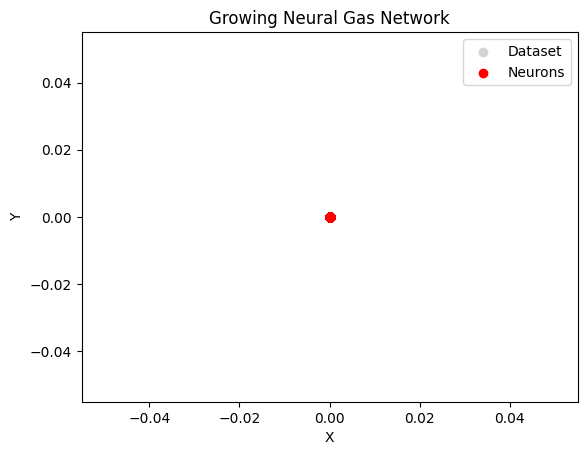

In [19]:
# Initialize and train the Growing Neural Gas network
max_neurons = 2500          # Maximum number of neurons
max_iter = 2500             # Maximum number of iterations
max_age = 15               # Maximum age of an edge before it is removed
eb = 0.1                   # Learning rate for the nearest neuron
en = 0.006                 # Learning rate for neighbors
alpha = 0.5                # Error reduction factor for neurons involved in new neurons
beta = 0.0005              # Error reduction factor for all neurons each iteration
l = 50                    # Number of learning steps between neuron insertions

gng = GrowingNeuralGas(max_neurons, max_iter, max_age, eb, en, alpha, beta, l, dataset)
trained_gng = gng.learn()

# Access trained neurons and edges for visualization
neurons = np.array([v['weight'] for v in trained_gng.vs])
edges = [(e.source, e.target) for e in trained_gng.es]

# Plotting the results
import matplotlib.pyplot as plt

# Plot the dataset
plt.scatter(dataset[:, 0], dataset[:, 1], color='lightgrey', label="Dataset")

# Plot the neurons
plt.scatter(neurons[:, 0], neurons[:, 1], color='red', label="Neurons")

# Plot the edges
for edge in edges:
    plt.plot([neurons[edge[0]][0], neurons[edge[1]][0]],
             [neurons[edge[0]][1], neurons[edge[1]][1]], color='blue', lw=0.5)

plt.legend()
plt.title("Growing Neural Gas Network")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()


In [20]:
num_nodes = trained_gng.vcount()
num_edges = trained_gng.ecount()

print(f"Number of nodes: {num_nodes}")
print(f"Number of edges: {num_edges}")

Number of nodes: 2498
Number of edges: 2387


In [21]:
import json
counts_over_time = gng.get_counts_over_time()

res = []
# Print the results
for timestamp, num_nodes, num_edges in counts_over_time:
    print(f"Time: {timestamp}, Nodes: {num_nodes}, Edges: {num_edges}")
    res.append({
        "index": timestamp,
        "num_nodes": num_nodes,
        "edge": num_edges
    })

with open("../LLCS/dataset3_GNG2_official.json", 'w') as json_file:
    json.dump(res, json_file, indent=4)  # indent=4 for pretty-printing


Time: 9, Nodes: 12, Edges: 15
Time: 19, Nodes: 22, Edges: 32
Time: 29, Nodes: 32, Edges: 49
Time: 39, Nodes: 42, Edges: 86
Time: 49, Nodes: 52, Edges: 110
Time: 59, Nodes: 62, Edges: 127
Time: 69, Nodes: 72, Edges: 163
Time: 79, Nodes: 82, Edges: 203
Time: 89, Nodes: 92, Edges: 217
Time: 99, Nodes: 102, Edges: 244
Time: 109, Nodes: 112, Edges: 280
Time: 119, Nodes: 122, Edges: 309
Time: 129, Nodes: 132, Edges: 349
Time: 139, Nodes: 142, Edges: 370
Time: 149, Nodes: 152, Edges: 396
Time: 159, Nodes: 162, Edges: 408
Time: 169, Nodes: 172, Edges: 429
Time: 179, Nodes: 182, Edges: 475
Time: 189, Nodes: 192, Edges: 501
Time: 199, Nodes: 202, Edges: 496
Time: 209, Nodes: 212, Edges: 507
Time: 219, Nodes: 222, Edges: 544
Time: 229, Nodes: 232, Edges: 580
Time: 239, Nodes: 242, Edges: 615
Time: 249, Nodes: 252, Edges: 592
Time: 259, Nodes: 262, Edges: 624
Time: 269, Nodes: 272, Edges: 652
Time: 279, Nodes: 282, Edges: 686
Time: 289, Nodes: 292, Edges: 703
Time: 299, Nodes: 302, Edges: 712
Time

In [ ]:
[[1,2,3], 2]